In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('bucky.mat')
A = in_data['A']

##

# Load data for activity: Another option
# A = imageio.imread("Whateveryoulike.png")
# A = np.average(A[:,:,0:3], axis=2)/256

rows, cols = np.array(A.shape)

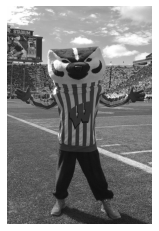

In [2]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

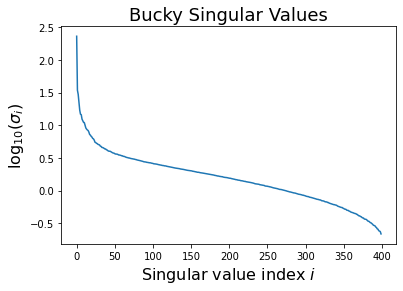

In [3]:
# Bucky's singular values

# Complete and uncomment line below
U,s,VT = np.linalg.svd(A, full_matrices=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

In [5]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i, r in enumerate(r_vals):
   
    # Complete and uncomment two lines below
    Ar = A[:,r]
    #Er = 
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

NameError: name 'Er' is not defined

[    0    50   100   150   200   250   300   350   400   450   500   550
   600   650   700   750   800   850   900   950  1000  1050  1100  1150
  1200  1250  1300  1350  1400  1450  1500  1550  1600  1650  1700  1750
  1800  1850  1900  1950  2000  2050  2100  2150  2200  2250  2300  2350
  2400  2450  2500  2550  2600  2650  2700  2750  2800  2850  2900  2950
  3000  3050  3100  3150  3200  3250  3300  3350  3400  3450  3500  3550
  3600  3650  3700  3750  3800  3850  3900  3950  4000  4050  4100  4150
  4200  4250  4300  4350  4400  4450  4500  4550  4600  4650  4700  4750
  4800  4850  4900  4950  5000  5050  5100  5150  5200  5250  5300  5350
  5400  5450  5500  5550  5600  5650  5700  5750  5800  5850  5900  5950
  6000  6050  6100  6150  6200  6250  6300  6350  6400  6450  6500  6550
  6600  6650  6700  6750  6800  6850  6900  6950  7000  7050  7100  7150
  7200  7250  7300  7350  7400  7450  7500  7550  7600  7650  7700  7750
  7800  7850  7900  7950  8000  8050  8100  8150  8

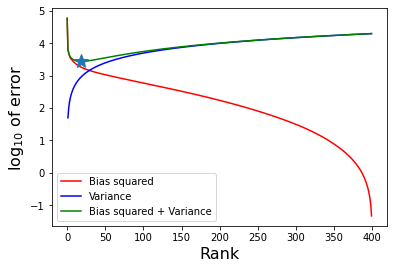

In [7]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 50
var = sigma2*ranks
print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()